# Exploratory Data Cleaning - Griff

## We want to answer the question: What movie genre should our studio invest in to make the most profit.


### In the cells below, IMDB, TMDB, and 'The Numbers' Datasets are imported into Pandas DataFrames for cleaning.  The following datasets are used:
- imdb name basics
- imdb title basics
- imdb title crew
- imdb title principals
- imdb title ratings
- tmdb movies
- tn movie budgets

### Pandas and Numpy are used for cleaning and analysis.  Matplotlib is for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### imdb.name.basics is imported and the birth_year, death_year, primary_profession, and known_for_titles columns are dropped because they will not be a part of this analysis.

In [2]:
imdb_name_basics = pd.read_csv('./data/imdb.name.basics.csv')
imdb_name_basics.drop(columns = {'birth_year', 
                                 'death_year',
                                 'primary_profession',
                                 'known_for_titles'},inplace=True)
imdb_name_basics.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


### imdb.title.basics is imported and the column original_title is dropped because only the primary_title will be used.  The variable we will be examining is genres.  Rows with missing values for genres will be dropped because they can't be replaced.  Runtime_minutes might be examined in the future. Missing values for runtime_minutes will be replaced with the median value. Median = 87 minutes, Mean = 86 minutes.

In [3]:
imdb_title_basics = pd.read_csv('./data/imdb.title.basics.csv')
imdb_title_basics.drop(columns = {'original_title'}, inplace = True)
imdb_title_basics = imdb_title_basics.loc[imdb_title_basics.genres.isna() == False]
imdb_title_basics.runtime_minutes.fillna(imdb_title_basics.runtime_minutes.median(), inplace = True)
# imdb_title_basics.genres = imdb_title_basics.genres.apply(lambda x: x.split(','))
imdb_title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


#### From the imdb.title.crew file, the writers column is dropped.  The directors column might be used in the future?

In [4]:
imdb_title_crew = pd.read_csv('./data/imdb.title.crew.csv')
imdb_title_crew.drop(columns = 'writers', inplace = True)
imdb_title_crew = imdb_title_crew.dropna()
# imdb_title_crew.directors = imdb_title_crew.directors.apply(lambda x: x.split(','))
imdb_title_crew.head()

,tconst,directors
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,"nm0089502,nm2291498,nm2292011"
5,tt0879859,nm2416460


#### The imdb.title.principals file has role data for movies.  The job and characters columns are almost entirely incomplete and are dropped.  This data might be used later?

In [5]:
imdb_title_principals = pd.read_csv('./data/imdb.title.principals.csv')
imdb_title_principals.drop(columns = {'job', 'characters'}, inplace = True)
imdb_title_principals.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


#### imdb.title.ratings has rating data.  We might use this at some point??

In [6]:
imdb_title_ratings = pd.read_csv('./data/imdb.title.ratings.csv')
imdb_title_ratings = imdb_title_ratings.loc[imdb_title_ratings.numvotes >5]
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### The tmdb.movies file has info about genre, original lanuage, original title, popularity, release date, and voting.  

In [7]:
tmdb_movies = pd.read_csv('./data/tmdb.movies.csv')
tmdb_movies.head()
# tmdb_movies = tmdb_movies.drop(columns = {'original_language', 'release_date'   , 'original_title'}).set_index('Unnamed: 0')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### This function removes the dollar sign and commas from a string, and turns it into a number

In [8]:
def clean_columns(series):
    return series.apply(lambda x: float(x.replace('$', '').replace(',', '')))

### tn.movie_budgets contains financial data that will be used in the comparison of genres.  The redundant ID column is dropped, and clean_columns() function is used to format the columns with money elements.

In [9]:
tn_movie_budgets = pd.read_csv('./data/tn.movie_budgets.csv')
tn_movie_budgets = tn_movie_budgets.drop(columns={'id'})
tn_movie_budgets.production_budget = clean_columns(tn_movie_budgets.production_budget)
tn_movie_budgets.domestic_gross = clean_columns(tn_movie_budgets.domestic_gross)
tn_movie_budgets.worldwide_gross = clean_columns(tn_movie_budgets.worldwide_gross)
tn_movie_budgets.release_date

0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Dec 15, 2017
            ...     
5777    Dec 31, 2018
5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object

### A new column is added, budget_gross_ratio, that is the ratio of worldwide_gross to production_budget.
#### Values <1 indicate the movie grossed less than the budget.

In [133]:
tn_movie_budgets['budget_gross_ratio'] = round(tn_movie_budgets.worldwide_gross / tn_movie_budgets.production_budget, 2)
tn_movie_budgets = tn_movie_budgets.loc[tn_movie_budgets.domestic_gross > 0]
tn_movie_budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio
341,2019-06-14,Men in Black: International,110000000.0,3100000.0,3100000.0,0.03
1997,2019-06-14,Shaft,30000000.0,600000.0,600000.0,0.02
4534,2019-06-07,Late Night,4000000.0,246305.0,246305.0,0.06
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,0.43
580,2019-06-07,The Secret Life of Pets 2,80000000.0,63795655.0,113351496.0,1.42


In [134]:
tn_movie_budgets = tn_movie_budgets.rename(columns = {'movie': 'title'})

In [135]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['release_date'].dt.year >= 2010]

In [136]:
tn_movie_budgets.sort_values(by = ['release_date'], inplace = True, ascending = False)

In [137]:
tn_movie_budgets.shape


(1787, 6)

In [138]:
tmdb_movies = pd.read_csv('./data/tmdb.movies.csv')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [139]:
tmdb_movies.drop(columns = {'id', 'original_language', 'original_title', 'release_date', 'Unnamed: 0' }, inplace = True)

In [140]:
tmdb_movies.head()

,genre_ids,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,Inception,8.3,22186


In [141]:
movies_pkle = pd.merge(tn_movie_budgets, tmdb_movies, how = 'inner', on ='title')
movies_pkle

,release_date,title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,genre_ids,popularity,vote_average,vote_count
0,2019-05-03,Long Shot,40000000.0,30202860.0,43711031.0,1.09,[99],5.034,7.2,39
1,2019-05-03,El Chicano,8000000.0,700261.0,700261.0,0.09,"[18, 28, 80]",5.274,9.0,1
2,2019-02-01,Miss Bala,15000000.0,14998027.0,15362298.0,1.02,"[18, 28]",10.128,6.3,50
3,2019-01-16,Dragon Ball Super: Broly,8500000.0,30376755.0,122747755.0,14.44,"[28, 16, 14, 12, 35, 878]",6.868,7.4,721
4,2019-01-11,The Upside,37500000.0,108235497.0,119024536.0,3.17,"[35, 18]",28.138,7.3,274
...,...,...,...,...,...,...,...,...,...,...
1766,2010-01-22,Extraordinary Measures,31000000.0,12482741.0,15826984.0,0.51,[18],6.300,6.3,153
1767,2010-01-15,The Spy Next Door,28000000.0,24307106.0,46752858.0,1.67,"[28, 35, 10751]",10.746,5.7,650
1768,2010-01-15,The Book of Eli,80000000.0,94835059.0,158750817.0,1.98,"[28, 53, 878]",18.985,6.7,3495
1769,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,1.72,"[10749, 35]",11.821,6.7,990


In [142]:


#movies_pkle = movies_pkle[movies_pkle['budget_gross_ratio'] < 10]

#df = df[df.line_race != 0]

#df.drop(df.index[df['line_race'] == 0], inplace = True)
drop_values = movies_pkle.index[ (movies_pkle['budget_gross_ratio'] >= 10)  ]

movies_pkle.drop(drop_values, inplace = True)


In [170]:
movies_pkle.shape

(1525, 10)

In [143]:

movies_pkle.drop(movies_pkle.index[(movies_pkle['budget_gross_ratio'] <= .1)], inplace = True)

#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Country'] == 'India') ]

movies_pkle.sample(10)

,release_date,title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,genre_ids,popularity,vote_average,vote_count
392,2016-11-11,Almost Christmas,17000000.0,42065185.0,42493506.0,2.50,"[35, 18]",6.532,5.6,245
55,2018-09-14,Mandy,6000000.0,1214525.0,1427656.0,0.24,"[28, 53, 27, 14, 9648]",16.240,6.2,618
803,2015-01-16,The Wedding Ringer,23000000.0,64460211.0,80171596.0,3.49,[35],15.876,6.5,961
505,2016-04-08,Hardcore Henry,2000000.0,9252038.0,17187434.0,8.59,"[28, 12, 878]",10.459,6.2,1294
1042,2010-04-09,The Square,1900000.0,406216.0,740932.0,0.39,"[99, 18, 36]",5.596,7.8,84
951,2014-04-16,Heaven is for Real,12000000.0,91386097.0,100916299.0,8.41,[18],9.718,6.2,363
1685,2010-07-23,Salt,130000000.0,118311368.0,290650494.0,2.24,"[28, 9648, 53]",13.025,6.3,3240
1409,2011-11-11,Melancholia,9400000.0,3030848.0,21817298.0,2.32,"[18, 878]",11.123,7.1,1642
1121,2013-05-31,After Earth,130000000.0,60522097.0,251499665.0,1.93,"[878, 28, 12]",14.415,5.1,4154
843,2014-10-31,Nightcrawler,8500000.0,32381218.0,50334418.0,5.92,"[80, 18, 53]",25.597,7.7,5860


In [172]:
def genre movies_pkle['genre_ids']

array(['[99]', '[18, 28]', '[35, 18]', '[53, 80, 18, 28]',
       '[9648, 12, 35, 80]', '[18, 36]', '[53, 878, 28, 12]',
       '[18, 36, 35]', '[18, 35, 14]', '[10749, 35]', '[28, 12, 14]',
       '[28, 12, 878]', '[14, 10751, 35]', '[18, 10749, 80]', '[12, 14]',
       '[80, 35]', '[80, 18, 53]', '[27, 18]', '[28, 12, 18]',
       '[12, 16, 10751]', '[12, 28, 53]', '[18]', '[80, 53]', '[12]',
       '[14, 12, 10751]', '[18, 10752]', '[27, 14]', '[18, 80]',
       '[12, 35, 14, 10751, 27]', '[36, 18]', '[53, 80, 9648, 18]',
       '[80, 18]', '[53]', '[878, 28]', '[16, 10751, 12, 14]', '[27]',
       '[35]', '[35, 18, 37]', '[28, 53, 27, 14, 9648]',
       '[878, 28, 53, 12, 27]', '[53, 80, 9648, 35, 18]', '[53, 28, 18]',
       '[28]', '[]', '[12, 18]', '[35, 18, 10749]', '[28, 878, 53, 27]',
       '[9648, 53, 27]', '[878, 53]', '[12, 35, 10751, 14]',
       '[53, 28, 80]', '[10751, 14, 35, 16]', '[14, 878, 35]',
       '[28, 12, 878, 35]', '[28, 80, 18, 53]', '[80, 18, 36, 53]',
  

tmdb_movies.head()

# Exploratory Data Analysis

In [144]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

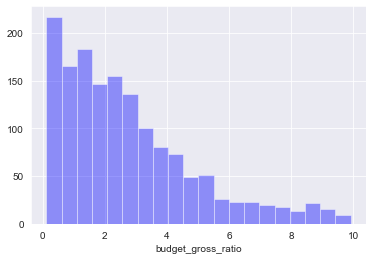

In [173]:
fig, ax = plt.subplots()
sns.distplot(movies_pkle['budget_gross_ratio'], kde = False, color = 'blue', bins=20
             , ax=ax)


In [167]:
mean = round(movies_pkle['budget_gross_ratio'].mean())
print(mean)

3


In [158]:
median = movies_pkle['budget_gross_ratio'].median()
print(median)

2.23


In [166]:
std = round(movies_pkle['budget_gross_ratio'].std(), 3)
print(std)

2.165


In [160]:
mode = movies_pkle['budget_gross_ratio'].mode()
print(mode)

0    2.97
dtype: float64


In [169]:
skew = round(movies_pkle['budget_gross_ratio'].skew(), 2)
print(skew)

1.16


### Below, the heads of each dataset are shown for viewing pleasure, and to help associate the sets with each other.  The get_name function takes a 'nconst' unique identifier and returns the name associated with that id.

In [11]:
def get_name(name):
    return imdb_name_basics.loc[imdb_name_basics.nconst == name]

In [12]:
imdb_name_basics.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


In [13]:
imdb_title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
imdb_title_crew.head()

,tconst,directors
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,"nm0089502,nm2291498,nm2292011"
5,tt0879859,nm2416460


In [16]:
imdb_title_principals.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [17]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# The tn_movie_budgets set is merged with the imdb_title_basics set on the title column.  From this table we can select subsets based on date and genre.

In [18]:
merge1 = tn_movie_budgets.rename(
    columns={'movie': 'primary_title'}).merge(imdb_title_basics, on= 'primary_title')
merge1.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,tconst,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6.532577,tt1775309,2011,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.546673,tt1298650,2011,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,0.427892,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.243841,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
4,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,6.827114,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"


### The unique occurances of genres is counted on indices.  Only genres that appear frequently are being used, so that rare instances of obscure genres do not significantly skew the data.

In [19]:
indices = merge1.genres.value_counts()
indices.loc[indices>40] #genres that occur in movies over 40 times

Drama                         425
Documentary                   244
Comedy                        124
Comedy,Drama                   91
Drama,Romance                  78
Comedy,Drama,Romance           76
Horror                         72
Adventure,Animation,Comedy     70
Thriller                       65
Action,Adventure,Sci-Fi        56
Action,Crime,Drama             53
Drama,Thriller                 52
Comedy,Romance                 49
Horror,Thriller                47
Horror,Mystery,Thriller        41
Name: genres, dtype: int64

# The budget gross ratio mean is calculated for the 15 most common genres

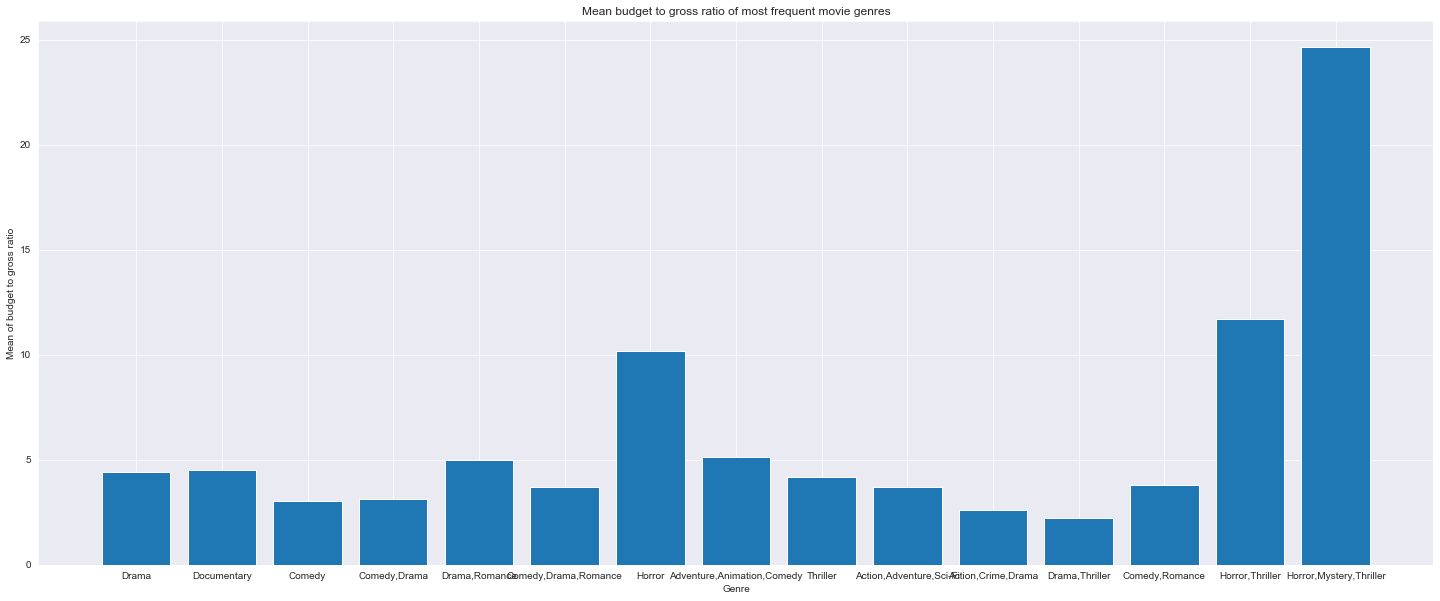

In [20]:
import seaborn as sns
sns.set_style('darkgrid')

bgrmean = merge1.groupby('genres').budget_gross_ratio.mean()
indices = merge1.genres.value_counts()[:15].index

mean_of_top_genres = bgrmean[indices]
fig, ax = plt.subplots(figsize = (25,10))
ax.set_title('Mean budget to gross ratio of most frequent movie genres')
ax.set_ylabel('Mean of budget to gross ratio')
ax.set_xlabel('Genre')
ax.bar(indices, mean_of_top_genres);

# Median budget to gross ratio

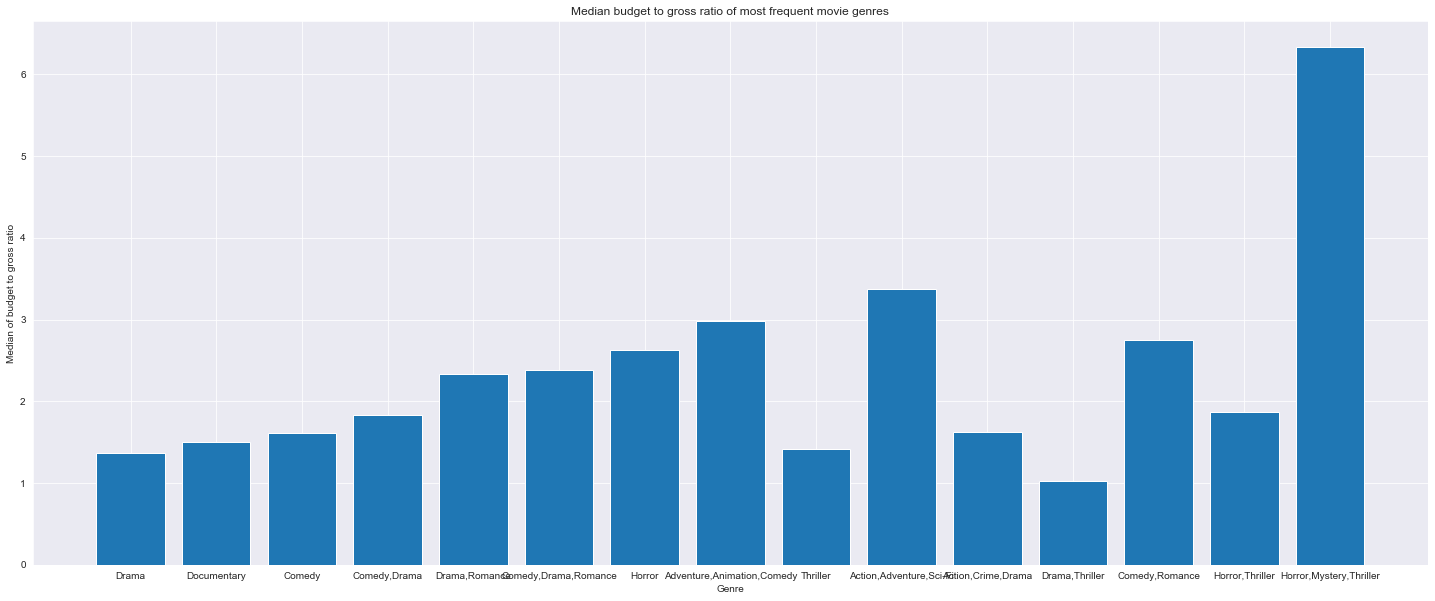

In [21]:
bgrmedian = merge1.groupby('genres').budget_gross_ratio.median()
indices = merge1.genres.value_counts()[:15].index

median_of_top_genres = bgrmedian[indices]
fig, ax = plt.subplots(figsize = (25,10))
ax.set_title('Median budget to gross ratio of most frequent movie genres')
ax.set_ylabel('Median of budget to gross ratio')
ax.set_xlabel('Genre')
ax.bar(indices, median_of_top_genres);

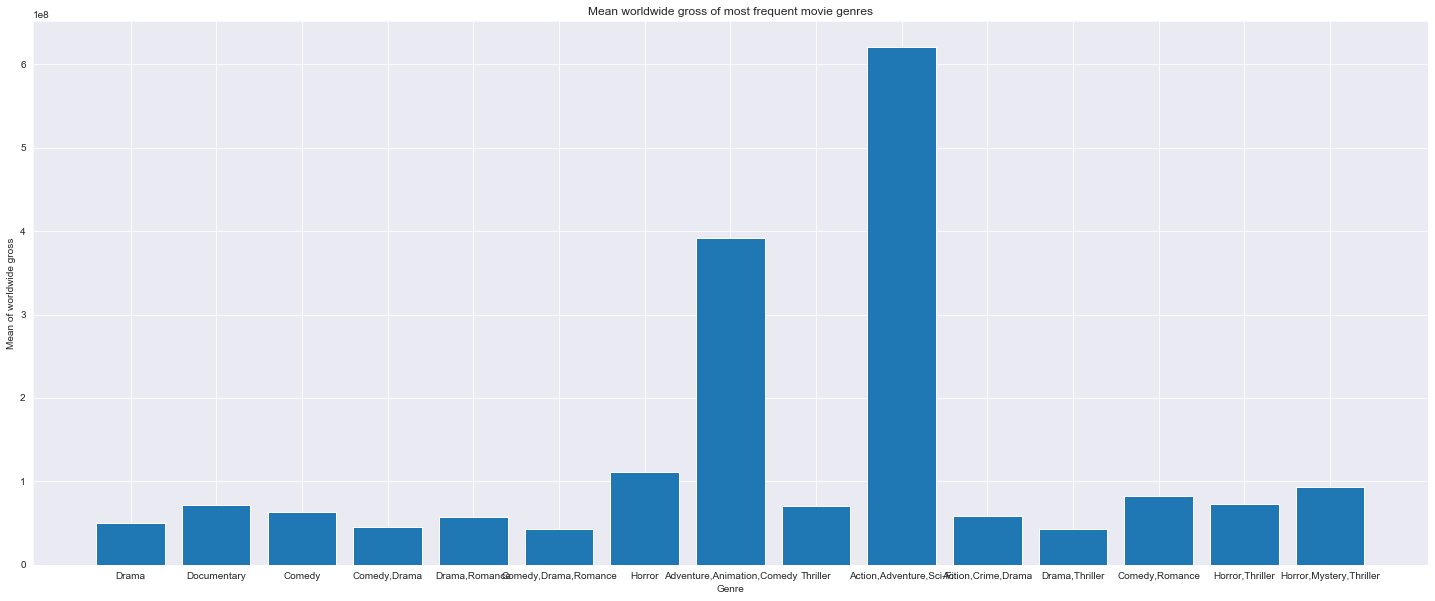

In [22]:
dat = merge1.groupby('genres').worldwide_gross.mean()
indices = merge1.genres.value_counts()[:15].index
mean_of_top_genres = dat[indices]
fig, ax = plt.subplots(figsize = (25,10))
ax.set_title('Mean worldwide gross of most frequent movie genres')
ax.set_ylabel('Mean of worldwide gross')
ax.set_xlabel('Genre')
ax.bar(indices, mean_of_top_genres);

In [23]:
imdb_title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
